<a href="https://colab.research.google.com/github/Mahdi-Abdollahii/NGC_6822/blob/main/BaSTI_Fitting/NGC6822_BaSTI_004.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Mahdi-Abdollahii/NGC_6822.git

Cloning into 'NGC_6822'...
remote: Enumerating objects: 1609, done.
remote: Counting objects: 100% (521/521), done.
remote: Compressing objects: 100% (308/308), done.
remote: Total 1609 (delta 274), reused 372 (delta 212), pack-reused 1088
Receiving objects: 100% (1609/1609), 118.55 MiB | 15.99 MiB/s, done.
Resolving deltas: 100% (797/797), done.
Updating files: 100% (167/167), done.


In [ ]:
%matplotlib inline
from matplotlib import cm
import matplotlib.pyplot as plt
import pylab as py
from matplotlib import gridspec
import numpy as np
import pandas as pd
import os
import scipy.integrate as integrate
pd.options.mode.chained_assignment = None  # default='warn'

from astropy.io import ascii
import csv
import matplotlib.colors as mcolors
from matplotlib.font_manager import FontProperties
import matplotlib.markers as mmark
import matplotlib.lines as mlines
from matplotlib.legend_handler import HandlerBase
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import AutoMinorLocator

import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import host_subplot
from matplotlib.patches import Rectangle
import matplotlib.colors as mcolor

In [ ]:
Z = 0.004
Z_name = ''.join(list(str(Z))[2:])

## Preparing data

In [ ]:
DM = 23.45 # based on sibbons => (Mateo 1998; Lee et al. 1993)

Av = 0.77  # based on whitelock 2012
Aj = 0.2   # based on whitelock 2012
Ah = 0.12  # based on whitelock 2012
Ak = 0.07  # based on whitelock 2012

RGBT = 17.42 # based on whitelock 2012

In [ ]:
file_address = '/content/NGC_6822/Data_V3/Final_cleaned_data_v3.csv'
df = pd.read_csv(file_address)
df = df.fillna(89.99)
df['Ks'] = df['Ks'] - Ak
df['J'] = df['J'] - Aj
df['J-Ks'] = df['J'] - df['Ks']

In [ ]:
df

,Ra(J2000) deg,Dec(J2000) deg,J,H,Ks,Types,Ref,R,J-Ks
0,296.183980,-14.780180,18.030,17.510,17.050,O,Whitelock,89.990,0.980
1,296.252290,-14.784750,17.290,16.540,16.010,O,Whitelock,89.990,1.280
2,296.204150,-14.634860,16.380,15.910,15.390,O,Whitelock,89.990,0.990
3,296.223640,-14.774730,16.240,15.580,15.060,O,Whitelock,89.990,1.180
4,296.218160,-14.880350,16.100,15.530,15.020,O,Whitelock,89.990,1.080
...,...,...,...,...,...,...,...,...,...
324,296.044067,-14.905341,18.304,17.750,17.311,C5.5,Kacharov,20.697,0.993
325,296.003693,-14.974893,18.192,17.560,17.140,C5.5,Kacharov,20.379,1.052
326,295.993561,-14.990264,17.674,16.702,15.770,C6.5,Kacharov,19.735,1.904
327,296.020050,-15.036669,17.551,17.008,16.619,C8.2,Kacharov,19.639,0.932


In [ ]:
df_Whitelock = pd.read_csv('/content/NGC_6822/Data/Whitelock.csv')
df_Whitelock

,Seq( ),RAJ2000(deg),DEJ2000(deg),M( ),Jmag(mag),e_Jmag(mag),o_Jmag( ),Hmag(mag),e_Hmag(mag),o_Hmag( ),Ksmag(mag),e_Ksmag(mag),o_Ksmag( ),J-H(mag),H-Ks(mag),J-Ks(mag),recno()
0,30370.0,296.17061,-14.95234,,17.588,0.087,7.0,17.170,0.044,10.0,17.138,0.078,9.0,0.418,0.032,0.450,1.0
1,31395.0,296.17062,-14.96028,,18.749,0.136,14.0,17.952,0.057,14.0,17.686,0.069,12.0,0.797,0.266,1.063,2.0
2,30746.0,296.17076,-14.97089,,17.537,0.033,13.0,17.091,0.040,14.0,17.061,0.078,14.0,0.446,0.030,0.476,3.0
3,31721.0,296.17082,-14.88634,,18.644,0.072,11.0,17.683,0.047,12.0,17.429,0.085,12.0,0.961,0.254,1.215,4.0
4,30982.0,296.17091,-14.89924,,17.498,0.021,11.0,17.000,0.049,15.0,16.867,0.057,13.0,0.498,0.133,0.631,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6252,21898.0,296.30447,-14.65989,,18.322,0.082,5.0,17.810,0.089,4.0,17.493,0.198,4.0,0.512,0.317,0.829,6253.0
6253,40643.0,296.30451,-14.75199,,16.742,0.011,6.0,16.021,0.083,8.0,15.823,0.099,6.0,0.721,0.198,0.919,6254.0
6254,10482.0,296.30455,-14.77980,,16.202,0.017,3.0,15.658,0.413,5.0,15.564,0.019,3.0,0.544,0.094,0.638,6255.0
6255,12680.0,296.30462,-14.76793,,17.940,0.010,3.0,16.843,0.371,5.0,16.656,0.012,2.0,1.097,0.187,1.284,6256.0


In [ ]:
X = (df['J-Ks'])
Y = (df['Ks'])

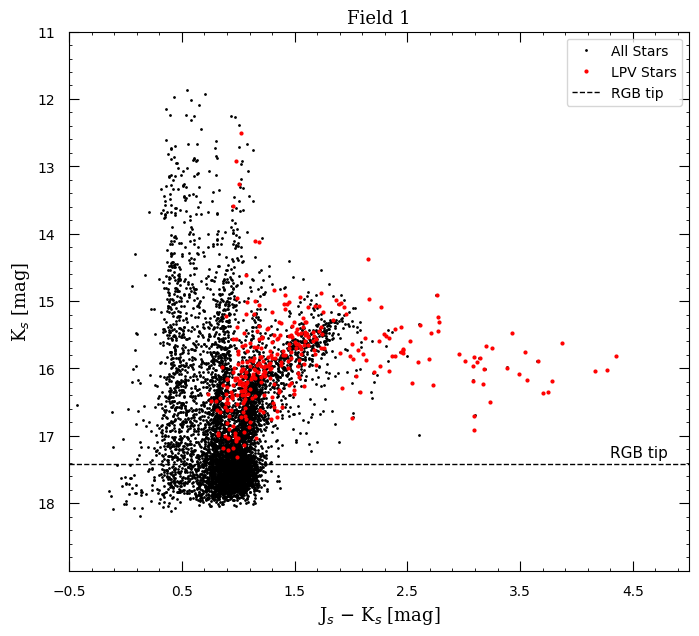

In [ ]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5 , -0.5
ymax , ymin = 19  , 11

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#All stars
plt.plot((df_Whitelock['Jmag(mag)']-Aj) - (df_Whitelock['Ksmag(mag)']-Ak), (df_Whitelock['Ksmag(mag)']-Ak) ,'k.', markersize = '2', label = 'All Stars')
plt.plot(X, Y,'r.', markersize = '4', label = 'LPV Stars')

#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

plt.legend(loc='upper right')
#plt.savefig('CMD-Field1.jpeg', bbox_inches='tight', dpi = 400)

# Adding BaSTI Isochrones

In [ ]:
# Specify the directory path you want to list files from
directory_path = '/content/drive/MyDrive/IPM/NGC 6822/BaSTI/ISO/'+Z_name+'/'

# Use os.listdir() to get a list of all files and directories in the specified directory
files = os.listdir(directory_path)

# Filter out only the files (excluding directories)
file_names = [file for file in files if os.path.isfile(os.path.join(directory_path, file))]

In [ ]:
columns = ["Age(Myr)","(M/Mo)in","(M/Mo)","log(L/Lo)","logTe","Mv","(U-B)","(B-V)","(V-I)","(V-R)","(V-J)","(V-K)","(V-L)","(H-K)"]
#columns = ["Age(Myr)","(M/Mo)in","(M/Mo)","log(L/Lo)","logTe","Mv","(V-I)","(V-R)","(V-J)","(V-K)","(V-L)","(H-K)"]
# Specify the path to your text file

list_lines = []

for file_name in file_names:
  file_path = directory_path + file_name

  #name_age = list(file_name.split(".")[0])
  #name_age.insert(-3, ".")
  #age = float(''.join(name_age))

  name_age = list(file_name.split("t6")[1].split("_")[0])
  #name_age.insert(-3, ".")
  age = float(''.join(name_age))




  # Open the file in 'read' mode
  with open(file_path, 'r') as file:
      # Iterate through each line in the file
      for line in file:
        if line.split()[0] != '#' and len(line.split()) > 1 :
          # Process the line (e.g., print it)
          list_lines.append([age] + line.split())  # strip() removes leading/trailing whitespace

df_iso = pd.DataFrame(list_lines ,columns=columns)
df_iso = df_iso.dropna(axis=1, how='all')
df_iso = df_iso.apply(pd.to_numeric, errors='coerce')
df_iso = df_iso.sort_values(by='Age(Myr)', ascending=True).reset_index().drop('index',axis=1)
df_iso.to_csv("BaSTI_iso_" + Z_name + ".csv")

In [ ]:
df_iso['logAge'] = round(np.log10(df_iso["Age(Myr)"]*10**6),3)
df_iso['Kmag'] =  df_iso["Mv"] - df_iso['(V-K)']
df_iso['Jmag'] =  df_iso["Mv"] - df_iso['(V-J)']

In [ ]:
ISO_df_basti= df_iso
ISO_df_basti['logAge'] = round(ISO_df_basti['logAge'], 3)
ISO_df_basti

,Age(Myr),(M/Mo)in,(M/Mo),log(L/Lo),logTe,Mv,(U-B),(B-V),(V-I),(V-R),(V-J),(V-K),(V-L),(H-K),logAge,Kmag,Jmag
0,30.0,0.500000,0.499986,-1.24446,3.62065,8.600,0.749,1.147,1.435,0.756,2.265,3.024,3.091,0.128,7.477,5.576,6.335
1,30.0,8.506013,8.402622,4.12810,3.65448,-5.081,0.866,1.132,1.162,0.587,1.937,2.674,2.745,0.073,7.477,-7.755,-7.018
2,30.0,8.505610,8.402334,4.12780,3.65417,-5.079,0.869,1.134,1.163,0.588,1.940,2.678,2.749,0.074,7.477,-7.757,-7.019
3,30.0,8.505207,8.402048,4.12750,3.65387,-5.076,0.872,1.135,1.165,0.589,1.943,2.682,2.753,0.074,7.477,-7.758,-7.019
4,30.0,8.504804,8.401762,4.12720,3.65357,-5.074,0.874,1.137,1.166,0.590,1.945,2.686,2.757,0.074,7.477,-7.760,-7.019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101245,10000.0,0.909407,0.902327,1.69790,3.68575,0.828,0.360,0.875,0.993,0.492,1.656,2.294,2.343,0.060,10.000,-1.466,-0.828
101246,10000.0,0.909437,0.902250,1.70662,3.68531,0.808,0.364,0.877,0.995,0.493,1.659,2.299,2.348,0.060,10.000,-1.491,-0.851
101247,10000.0,0.909467,0.902170,1.71503,3.68491,0.789,0.368,0.880,0.997,0.494,1.663,2.304,2.352,0.060,10.000,-1.515,-0.874
101248,10000.0,0.909287,0.902600,1.65974,3.68757,0.915,0.344,0.866,0.985,0.487,1.642,2.274,2.322,0.060,10.000,-1.359,-0.727


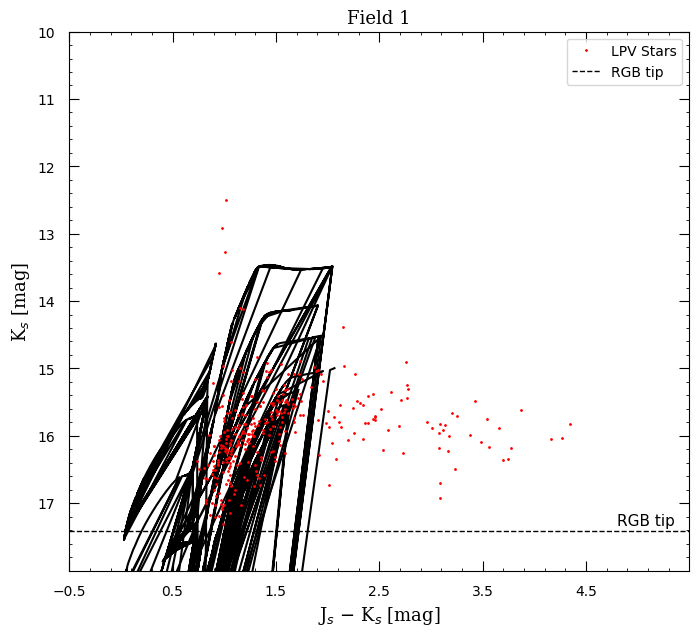

In [ ]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 18  , 10

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#ISO
LOG_AGE_ALL = list(np.unique(ISO_df_basti["logAge"]))

LOG_AGE = LOG_AGE_ALL
for i in LOG_AGE[::5]:
  X_ISO = (ISO_df_basti[ ISO_df_basti['logAge'] == i ]['Jmag'])  -  (ISO_df_basti[ ISO_df_basti['logAge'] == i ]['Kmag'])
  Y_ISO = (ISO_df_basti[ ISO_df_basti['logAge'] == i ]['Kmag']) + DM
  plt.plot(X_ISO,Y_ISO , 'k')

#All stars
plt.plot(X, Y,'r.', markersize = '2', label = 'LPV Stars')

#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

plt.legend(loc='upper right')
plt.savefig('CMD-'+Z_name+'.jpeg', bbox_inches='tight', dpi = 400)

# Adding Padova Isochrones

In [ ]:
!pip install git+https://github.com/Mahdi-Abdollahii/AstroDC.git

  Cloning https://github.com/Mahdi-Abdollahii/AstroDC.git to /tmp/pip-req-build-b4cja6ag
  Running command git clone --filter=blob:none --quiet https://github.com/Mahdi-Abdollahii/AstroDC.git /tmp/pip-req-build-b4cja6ag
  Resolved https://github.com/Mahdi-Abdollahii/AstroDC.git to commit 6d94723b263b5b088791d07a5a66e931e24dde07
  Preparing metadata (setup.py) ... done
  Created wheel for AstroDC: filename=AstroDC-1.0.5-py3-none-any.whl size=2586 sha256=ce68871c4a8590b0d73831025583919fab77e1046be5ff8ee7af53bd0f5f9436
  Stored in directory: /tmp/pip-ephem-wheel-cache-o2xdxlud/wheels/82/b8/db/4179fef6fc03770dd498d786816b5f961dce1b9a70bd9499cd
Successfully built AstroDC


In [ ]:
from AstroDC import AstroDC

In [ ]:
AstroDC.Stev_Isochrone_CSV('/content/NGC_6822/Data_Isochrones/ISO_'+ "003" +'_01.dat','ISO_01')

# File generated by CMD 3.7 (http://stev.oapd.inaf.it/cmd) on Sun Jan 29 14:44:37 CET 2023
# isochrones based on PARSEC release v1.2S +  COLIBRI S_37 + S_35 + PR16
# Basic references: Bressan et al. (2012), MNRAS, 427, 127 + Chen et al. (2014, 2015), MNRAS, 444, 2525 + MNRAS, 452, 1068 + Tang et al. (2014), MNRAS, 445, 4287 + Marigo et al. (2017), ApJ, 835, 77 + Pastorelli al. (2019), MNRAS, 485, 5666 + Pastorelli al. (2020), MNRAS, in press
# Thermal pulse cycles included 
# On RGB, assumed Reimers mass loss with efficiency eta=0.1
# LPV periods and growth rates added cf. Trabucchi et al. (2019)
# but fundamental-mode LPV periods are from Trabucchi et al. (2021)
# Photometric system: <i>UBVRIJHK</i> (cf. Maiz-Apellaniz 2006 + Bessell 1990)
# Attention: photometry includes extinction of Av=0.77, with coefficients derived for the Sun, for Cardelli et al 89 + O'Donnell 94 Rv=3.1 extinction curve.
# Using OBC version of bolometric corrections as detailed in Marigo et al. (2008, A&A 482, 8

In [ ]:
ISO_df_01= pd.read_csv("ISO_01.csv")
ISO_df_01['logAge'] = round(ISO_df_01['logAge'], 3)
ISO_df_01

,Zini,MH,logAge,Mini,int_IMF,Mass,logL,logTe,logg,label,...,Z,mbolmag,Umag,Bmag,Vmag,Rmag,Imag,Jmag,Hmag,Kmag
0,0.003,-0.70993,6.60,0.090000,1.081690,0.090,-1.548,3.4713,3.777,0,...,0.003170,8.639,15.957,13.948,12.018,10.517,8.701,6.970,6.283,5.989
1,0.003,-0.70993,6.60,0.107089,1.227738,0.107,-1.481,3.4793,3.818,0,...,0.003170,8.473,15.730,13.649,11.682,10.230,8.494,6.825,6.137,5.846
2,0.003,-0.70993,6.60,0.116314,1.294523,0.116,-1.452,3.4826,3.838,0,...,0.003170,8.400,15.633,13.523,11.539,10.107,8.404,6.761,6.073,5.782
3,0.003,-0.70993,6.60,0.123632,1.342790,0.123,-1.425,3.4857,3.849,0,...,0.003170,8.332,15.507,13.395,11.407,9.994,8.322,6.702,6.013,5.722
4,0.003,-0.70993,6.60,0.131874,1.392891,0.132,-1.392,3.4891,3.858,0,...,0.003170,8.251,15.354,13.250,11.263,9.868,8.229,6.630,5.940,5.649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19751,0.003,-0.70993,10.05,0.881294,2.444167,0.550,3.143,3.5943,0.364,7,...,0.004429,-3.089,2.896,0.724,-1.198,-2.248,-3.149,-4.457,-5.356,-5.562
19752,0.003,-0.70993,10.05,0.881294,2.444167,0.537,3.159,3.6052,0.381,7,...,0.004432,-3.127,2.540,0.490,-1.370,-2.370,-3.227,-4.482,-5.340,-5.533
19753,0.003,-0.70993,10.05,0.881294,2.444167,0.526,3.171,3.6171,0.408,7,...,0.004419,-3.158,2.136,0.247,-1.537,-2.484,-3.297,-4.495,-5.311,-5.488
19754,0.003,-0.70993,10.05,0.881294,2.444167,0.519,3.177,3.6225,0.419,7,...,0.004413,-3.172,1.946,0.138,-1.609,-2.532,-3.328,-4.499,-5.297,-5.467


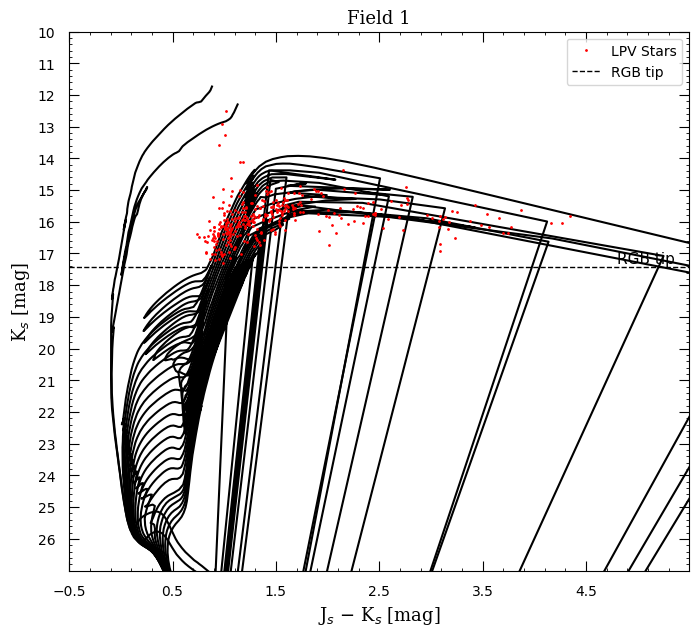

In [ ]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 27  , 10

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#ISO
LOG_AGE_ALL = [6.8,7,8,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,9,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10,10.1]

LOG_AGE = LOG_AGE_ALL
for i in LOG_AGE :
  X_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Jmag'])  -  (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag'])
  Y_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag']) + DM
  plt.plot(X_ISO,Y_ISO , 'k')

#All stars
plt.plot(X, Y,'r.', markersize = '2', label = 'LPV Stars')

#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

plt.legend(loc='upper right')
plt.savefig('CMD-'+Z_name+'.jpeg', bbox_inches='tight', dpi = 400)

# Fitting

In [ ]:
index_basti  = list(ISO_df_basti.groupby(['logAge']).Kmag.idxmin())
df_prime_basti = ISO_df_basti.iloc[index_basti]
df_prime_basti['Iso_Model'] = 'BaSTI'

index_padova  = list(ISO_df_01.groupby(['logAge']).Kmag.idxmin())
df_prime_padova = ISO_df_01.iloc[index_padova]
df_prime_padova['Iso_Model'] = 'Padova'

index_padova  = list(ISO_df_01.groupby(['logAge']).Kmag.idxmin())
df_prime2_padova = ISO_df_01.iloc[index_padova]
df_prime2_padova['Iso_Model'] = 'Padova'

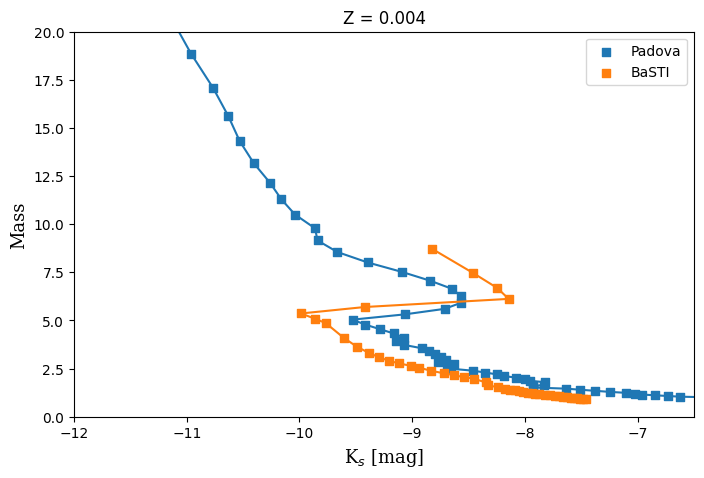

In [ ]:
plt.figure(figsize=[8,5])
plt.plot(df_prime_padova['Kmag'],df_prime_padova['Mini'])
plt.scatter(df_prime_padova['Kmag'],df_prime_padova['Mini'],label= "Padova" , marker = "s" )

plt.plot(df_prime_basti['Kmag'],df_prime_basti['(M/Mo)in'])
plt.scatter(df_prime_basti['Kmag'],df_prime_basti['(M/Mo)in'],label= "BaSTI",marker = "s"  )

plt.xlabel('K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('Mass', fontsize = 13, fontname = "serif")
plt.title("Z = 0." + Z_name )

plt.xlim(-12,-6.5)
plt.ylim(0,20)
plt.legend()
plt.savefig("Mass_Kmag_relation.png", dpi = 400)

In [ ]:
basti_prime_1 = df_prime_padova[df_prime_padova['Mini'] > max(df_prime_basti['(M/Mo)in'])]
basti_prime_2 = df_prime_padova[df_prime_padova['Mini'] < min(df_prime_basti['(M/Mo)in'])]
basti_prime = pd.concat([basti_prime_1, basti_prime_2])

#Adding some columns which are nor common
basti_prime["Age(Myr)"] = (10**basti_prime["logAge"])/10**6
basti_prime["(U-B)"] = basti_prime['Umag'] - basti_prime['Bmag']
basti_prime["(B-V)"] = basti_prime['Bmag'] - basti_prime['Vmag']
basti_prime["(V-I)"] = basti_prime['Vmag'] - basti_prime['Imag']
basti_prime["(V-R)"] = basti_prime['Vmag'] - basti_prime['Rmag']
basti_prime["(V-J)"] = basti_prime['Vmag'] - basti_prime['Jmag']
basti_prime["(V-K)"] = basti_prime['Vmag'] - basti_prime['Kmag']
basti_prime["(H-K)"] = basti_prime['Hmag'] - basti_prime['Kmag']


# Create a dictionary to map old column names to new column names
new_column_names = {'Mini': '(M/Mo)in', 'Mass': '(M/Mo)', 'logL': 'log(L/Lo)', 'Vmag': 'Mv'}

# Use the .rename() method to change column names
basti_prime.rename(columns=new_column_names, inplace=True)

basti_f= pd.concat([basti_prime, df_prime_basti])
df_prime_basti = basti_f.loc[:,list(df_prime_basti.columns)]


In [ ]:
df_prime_basti = df_prime_basti.sort_values("(M/Mo)in",ascending=True)
df_prime_basti = df_prime_basti.reset_index()

In [ ]:
df_prime_basti

,index,Age(Myr),(M/Mo)in,(M/Mo),log(L/Lo),logTe,Mv,(U-B),(B-V),(V-I),(V-R),(V-J),(V-K),(V-L),(H-K),logAge,Kmag,Jmag,Iso_Model
0,19665,11220.184543,0.878756,0.838000,3.36200,3.55700,-1.128,2.422,2.110,2.420,1.252,3.929,5.212,NaN,0.256,10.050,-6.340,-5.057,Padova
1,19453,10000.000000,0.908110,0.869000,3.36100,3.55880,-1.162,2.411,2.098,2.390,1.240,3.888,5.164,NaN,0.254,10.000,-6.326,-5.050,Padova
2,101249,10000.000000,0.913930,0.651649,3.66959,3.51277,-1.800,2.226,2.164,2.557,1.034,4.218,5.656,5.848,0.345,10.000,-7.456,-6.018,BaSTI
3,97489,9500.000000,0.926947,0.657988,3.67743,3.51089,-1.790,2.231,2.180,2.580,1.035,4.243,5.691,5.886,0.352,9.978,-7.481,-6.033,BaSTI
4,95624,9000.000000,0.940868,0.664668,3.68569,3.50892,-1.774,2.233,2.196,2.610,1.039,4.275,5.734,5.932,0.359,9.954,-7.508,-6.049,BaSTI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,1472,6.309573,33.442341,29.800000,5.70500,3.63610,-7.997,1.955,1.831,1.717,0.933,2.837,3.719,NaN,0.157,6.800,-11.716,-10.834,Padova
62,1179,5.623413,38.535252,32.029000,5.81300,3.66810,-8.556,1.342,1.503,1.481,0.788,2.444,3.203,NaN,0.124,6.750,-11.759,-11.000,Padova
63,891,5.011872,45.197887,36.638000,5.93700,3.68420,-8.973,1.109,1.351,1.380,0.726,2.277,2.981,NaN,0.119,6.700,-11.954,-11.250,Padova
64,590,4.466836,54.204861,42.275000,6.06800,3.70170,-9.395,0.923,1.204,1.281,0.667,2.115,2.762,NaN,0.116,6.650,-12.157,-11.510,Padova


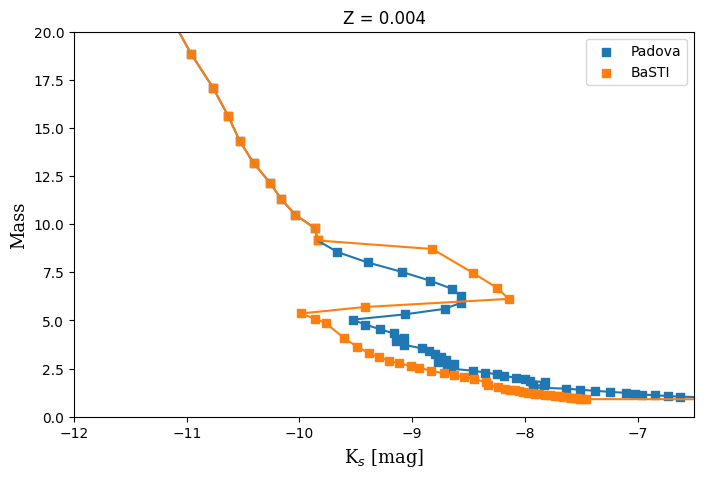

In [ ]:
plt.figure(figsize=[8,5])
plt.plot(df_prime_padova['Kmag'],df_prime_padova['Mini'])
plt.scatter(df_prime_padova['Kmag'],df_prime_padova['Mini'],label= "Padova" , marker = "s" )

plt.plot(df_prime_basti['Kmag'],df_prime_basti['(M/Mo)in'])
plt.scatter(df_prime_basti['Kmag'],df_prime_basti['(M/Mo)in'],label= "BaSTI",marker = "s"  )

plt.xlabel('K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('Mass', fontsize = 13, fontname = "serif")
plt.title("Z = 0." + Z_name )

plt.xlim(-12,-6.5)
plt.ylim(0,20)
plt.legend()
plt.savefig("Mass_Kmag_relation.png", dpi = 400)

In [ ]:
selected_df = df_prime_basti
M_col_name = '(M/Mo)in'

selected_df = selected_df.sort_values(M_col_name,ascending=True)
selected_df = selected_df.reset_index()
selected_df['Slope'] = np.nan
selected_df['Slope_var'] = np.nan


for i in range(len(selected_df)-1):
  delta_y = float(selected_df.loc[i+1,"Kmag"])-float(selected_df.loc[i,"Kmag"])
  delta_x = selected_df.loc[i+1,M_col_name]-selected_df.loc[i,M_col_name]
  selected_df.at[i+1,'Slope'] = delta_y / delta_x
  selected_df.at[i+1,'Slope_var'] = (delta_y / delta_x) * selected_df.at[i+1,'Slope']



In [ ]:
df_2 = selected_df[selected_df[M_col_name]<12]
df_2 = df_2[df_2[M_col_name]>3]

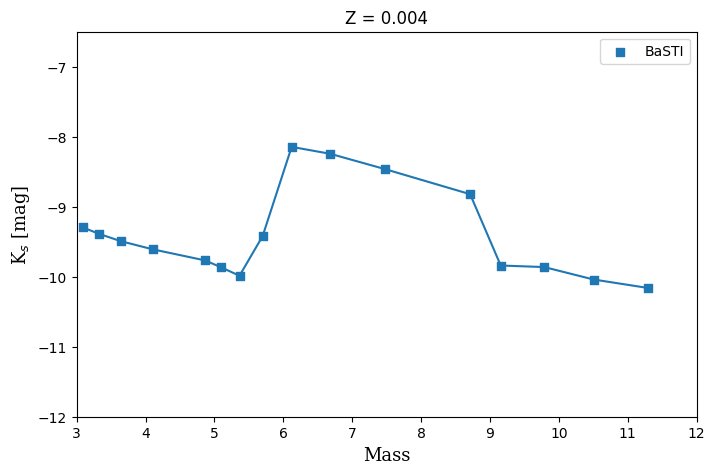

In [ ]:
plt.figure(figsize=[8,5])
plt.plot(df_2[M_col_name],df_2['Kmag'])
plt.scatter(df_2[M_col_name],df_2['Kmag'],label= "BaSTI" , marker = "s" )

#plt.plot(df_prime_basti['Kmag'],df_prime_basti['(M/Mo)in'])
#plt.scatter(df_prime_basti['Kmag'],df_prime_basti['(M/Mo)in'],label= "BaSTI",marker = "s"  )

plt.xlabel('Mass', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.title("Z = 0." + Z_name )

plt.ylim(-12,-6.5)
plt.xlim(3,12)
plt.legend()
plt.savefig("Mass_Kmag_relation.png", dpi = 400)

In [ ]:
selected_index = []
for i in list(df_2.index):
  if selected_df.loc[i,"Slope"]<0 and selected_df.loc[i+1,"Slope"]>0 :
    if selected_df.loc[i+2,"Slope"]>0:
      selected_index.append(i)

In [ ]:
df_low = selected_df.loc[selected_index[0]]
df_high = selected_df[selected_df['Kmag'] < df_low['Kmag']]

low_index = selected_index[0]-2
high_index = list(df_high.index)[0]+6

delta_y = selected_df.loc[high_index,'Kmag'] - selected_df.loc[low_index,'Kmag']
delta_x = selected_df.loc[high_index,M_col_name] - selected_df.loc[low_index,M_col_name]

slope = delta_y / delta_x
intercept = selected_df.loc[high_index,'Kmag'] - slope * selected_df.loc[high_index,M_col_name]

In [ ]:
for i in range(low_index,high_index+1):
  selected_df.at[i,'Kmag'] = slope * selected_df.loc[i,M_col_name] + intercept

In [ ]:
selected_df_prime = selected_df.iloc[-6:]
selcted_index = list(selected_df_prime.index)
selected_df_prime.drop("level_0", axis=1, inplace=True)
selected_df_prime =selected_df_prime.reset_index()

delta_x_prime = selected_df_prime.loc[0,M_col_name] - selected_df_prime.loc[len(selected_df_prime)-1,M_col_name]
delta_y_prime = selected_df_prime.loc[0,'Kmag'] - selected_df_prime.loc[len(selected_df_prime)-1,'Kmag']
slope_prime = delta_y_prime / delta_x_prime
intercept_prime = selected_df_prime.loc[2,'Kmag'] - slope_prime * selected_df_prime.loc[2,M_col_name]

In [ ]:
for i in selcted_index :
  selected_df.at[i,'Kmag'] = slope_prime * selected_df.loc[i,M_col_name] + intercept_prime

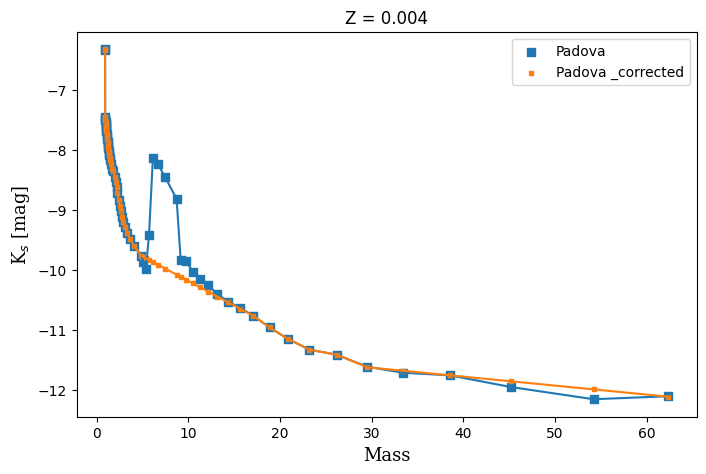

In [ ]:
plt.figure(figsize=[8,5])

plt.plot(df_prime_basti[M_col_name],df_prime_basti['Kmag'])
plt.scatter(df_prime_basti[M_col_name],df_prime_basti['Kmag'],label= "Padova" , marker = "s" )

plt.plot(selected_df[M_col_name],selected_df['Kmag'])
plt.scatter(selected_df[M_col_name],selected_df['Kmag'],label= "Padova _corrected" , marker = "s" , s = 5 )


plt.xlabel('Mass', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.title("Z = 0." + Z_name )

#plt.ylim(-12,-6.5)
#plt.xlim(0,20)
plt.legend()
plt.savefig("Kmag_Mass_relation_Corr.png", dpi = 400)

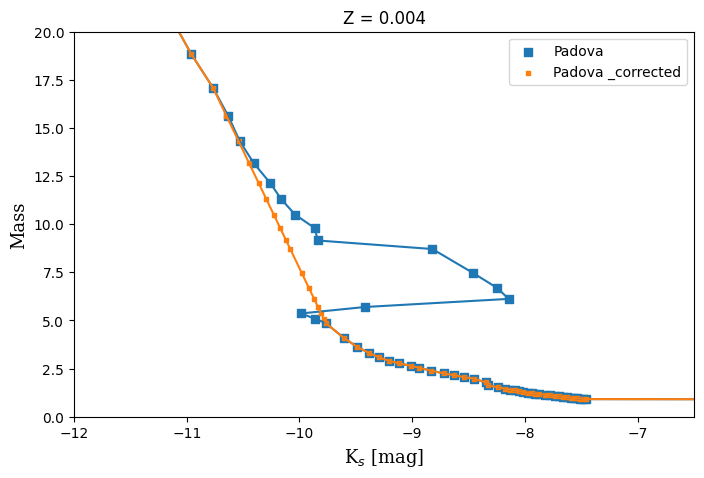

In [ ]:
plt.figure(figsize=[8,5])

plt.plot(df_prime_basti['Kmag'],df_prime_basti[M_col_name])
plt.scatter(df_prime_basti['Kmag'],df_prime_basti[M_col_name],label= "Padova" , marker = "s" )

plt.plot(selected_df['Kmag'],selected_df[M_col_name])
plt.scatter(selected_df['Kmag'],selected_df[M_col_name],label= "Padova _corrected" , marker = "s" , s = 5 )

# plt.plot(df_prime_basti['Kmag'],df_prime_basti['(M/Mo)in'])
# plt.scatter(df_prime_basti['Kmag'],df_prime_basti['(M/Mo)in'],label= "BaSTI",marker = "s"  )

plt.ylabel('Mass', fontsize = 13, fontname = "serif")
plt.xlabel('K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.title("Z = 0." + Z_name )

plt.xlim(-12,-6.5)
plt.ylim(0,20)
plt.legend()
plt.savefig("Mass_Kmag_relation_Corr.png", dpi = 400)

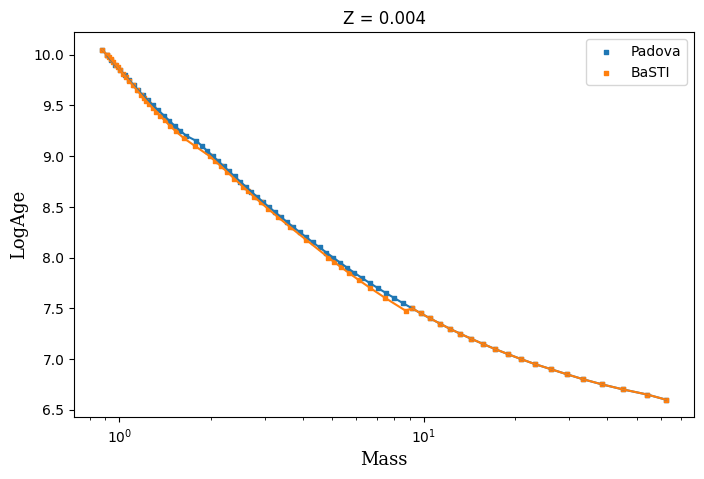

In [ ]:
plt.figure(figsize=[8,5])
plt.plot(df_prime_padova['Mini'],df_prime_padova['logAge'])
plt.scatter(df_prime_padova['Mini'],df_prime_padova['logAge'],label= "Padova" , marker = "s" , s = 5 )

plt.plot(df_prime_basti['(M/Mo)in'],df_prime_basti['logAge'])
plt.scatter(df_prime_basti['(M/Mo)in'],df_prime_basti['logAge'],label= "BaSTI",marker = "s", s = 5  )

plt.xscale("log")
plt.ylabel('LogAge', fontsize = 13, fontname = "serif")
plt.xlabel('Mass', fontsize = 13, fontname = "serif")
plt.title("Z = 0." + Z_name )

plt.legend()
plt.savefig("Age_Mass_relation.png", dpi = 400)

In [ ]:
selected_df = selected_df[selected_df['Iso_Model']=='BaSTI']
selected_df = selected_df.drop('level_0',axis=1)
selected_df = selected_df.reset_index()
selected_df = selected_df.drop('level_0',axis=1)

In [ ]:
import numpy as np
from astropy.modeling import models, fitting

# Generate or import your data points (x, y) for the curve

x_curve = np.array(np.log10(selected_df[M_col_name]))
y_curve = np.array(selected_df['logAge'])

# Define the number of small line segments you want to fit
num_segments = 11

# Calculate the number of points per segment
points_per_segment = len(x_curve) // num_segments

# Initialize lists to store slopes and intercepts for each segment
slopes = []
intercepts = []

slopes_prime = []
intercepts_prime = []

lower_lim = []
higher_lim = []
# Create a linear model
linear_model = models.Linear1D()

# Create a fitting object
fitter = fitting.LinearLSQFitter()


# Fit lines to each segment and calculate slopes and intercepts
i = 0
while (i) * points_per_segment < len(x_curve) :

    start_idx = i * points_per_segment - 1
    if start_idx < 0:
      start_idx = 0

    end_idx = (i + 1) * points_per_segment

    if end_idx > len(x_curve):
       end_idx = len(x_curve)

    x_segment = x_curve[start_idx:end_idx]
    y_segment = y_curve[start_idx:end_idx]
    lower_lim.append(x_segment[0])
    higher_lim.append(x_segment[-1])


    # Fit the linear model to the segment
    fitted_model = fitter(linear_model, x_segment, y_segment)

    # Extract the slope and intercept from the fitted model
    slope = fitted_model.slope.value
    intercept = fitted_model.intercept.value

    slopes.append(slope)
    intercepts.append(intercept)

    delta_x = x_segment[-1] - x_segment[0]
    delta_y = y_segment[-1] - y_segment[0]
    slope_ = delta_y/delta_x
    intercep_ = y_segment[0] - slope_ * x_segment[0]
    slopes_prime.append(slope_)
    intercepts_prime.append(intercep_)

    i = i + 1

# Print slopes and intercepts for each segment
for i in range(len(slopes)):
    print(f"Segment {i + 1}: Slope = {slopes[i]}, Intercept = {intercepts[i]}")

# Making Data frame for SFH calculation
columns = ['Z','a','b','M validity range (lower limit)','M validity range (upper limit)']

z_list = [Z] * len(lower_lim)
# Calling DataFrame constructor after zipping
# both lists, with columns specified
Mass_Age_df = pd.DataFrame(list(zip(z_list, slopes_prime,intercepts_prime,
                               lower_lim,higher_lim )), columns =columns)

Mass_Age_df.to_csv("Mass_Age_relation_data.csv")

Segment 1: Slope = -3.6546742449465266, Intercept = 9.857318123538077
Segment 2: Slope = -3.614596888462986, Intercept = 9.858167695494874
Segment 3: Slope = -3.5781211127722217, Intercept = 9.857069219552969
Segment 4: Slope = -3.3904497135217198, Intercept = 9.846460680611875
Segment 5: Slope = -3.167475396173007, Intercept = 9.823923278638691
Segment 6: Slope = -2.5227759399338128, Intercept = 9.71995643363479
Segment 7: Slope = -2.4212042284461175, Intercept = 9.709227279608058
Segment 8: Slope = -2.7685090701044004, Intercept = 9.824393670751846
Segment 9: Slope = -2.520043576434197, Intercept = 9.71355790406988
Segment 10: Slope = -2.3719905741117517, Intercept = 9.631290388799258
Segment 11: Slope = -2.089487854949164, Intercept = 9.424675979432731
Segment 12: Slope = -1.8771241886636272, Intercept = 9.241699632304066


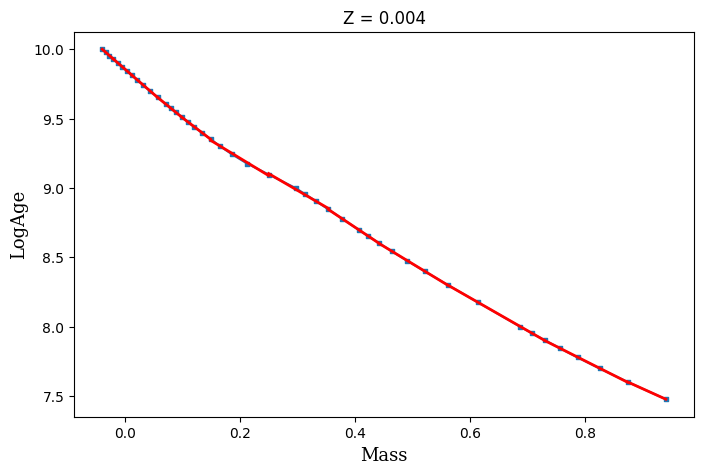

In [ ]:
plt.figure(figsize=[8,5])
plt.scatter(x_curve,y_curve,label= "BaSTI",marker = "s", s = 5 )
plt.plot(x_curve,y_curve)
for i in range(len(slopes)):
# Create x values within the limits
  x = np.linspace(lower_lim[i], higher_lim[i], 100)

  # Calculate y values based on the slope
  y = slopes[i] * x + intercepts[i]

  # Create the plot
  plt.plot(x, y, label=f'Slope = {slope}', color='red', linewidth=2)

  plt.ylabel('LogAge', fontsize = 13, fontname = "serif")
  plt.xlabel('Mass', fontsize = 13, fontname = "serif")
  plt.title("Z = 0." + Z_name )

  plt.savefig("Age_Mass_relation_fitted_line.png", dpi = 400)

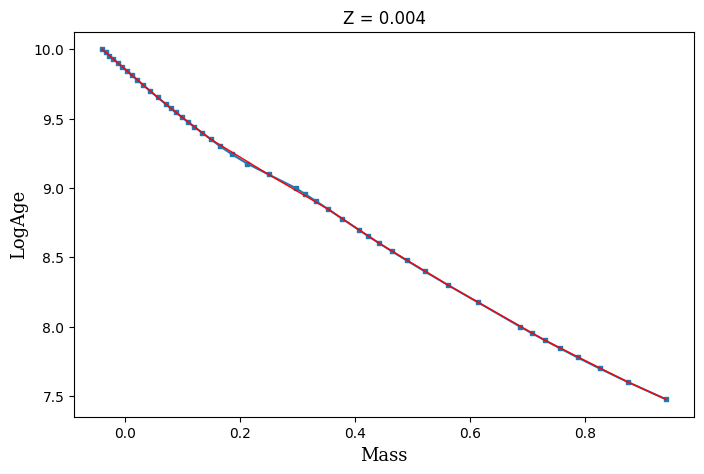

In [ ]:
plt.figure(figsize=[8,5])
plt.scatter(x_curve,y_curve,label= "BaSTI",marker = "s", s = 5 )
plt.plot(x_curve,y_curve)
for i in range(len(slopes)):
# Create x values within the limits
  x = np.linspace(lower_lim[i], higher_lim[i], 100)

  # Calculate y values based on the slope
  y = slopes_prime[i] * x + intercepts_prime[i]

  # Create the plot
  plt.plot(x, y, label=f'Slope = {slope}', color='red', linewidth=1)

  plt.ylabel('LogAge', fontsize = 13, fontname = "serif")
  plt.xlabel('Mass', fontsize = 13, fontname = "serif")
  plt.title("Z = 0." + Z_name )

  plt.savefig("Age_Mass_relation_fitted_line.png", dpi = 400)

In [ ]:
import numpy as np
from astropy.modeling import models, fitting

# Generate or import your data points (x, y) for the curve

x_curve = np.array(np.log10(selected_df[M_col_name]))
y_curve = np.array(selected_df['logAge'])

# Initialize lists to store slopes and intercepts for each segment
slopes = []
intercepts = []

slopes_prime = []
intercepts_prime = []

lower_lim = []
higher_lim = []

# Create a linear model
linear_model = models.Linear1D()

# Create a fitting object
fitter = fitting.LinearLSQFitter()


# Fit lines to each segment and calculate slopes and intercepts
index_1_prime = [0,11,19,22,24,34,37,42,len(x_curve)]

for i in range(len(index_1_prime)-1):

    x_segment = x_curve[index_1_prime[i]:index_1_prime[i+1]+1]
    y_segment = y_curve[index_1_prime[i]:index_1_prime[i+1]+1]

    lower_lim.append(x_segment[0])
    higher_lim.append(x_segment[-1])

    # Fit the linear model to the segment
    fitted_model = fitter(linear_model, x_segment, y_segment)

    # Extract the slope and intercept from the fitted model
    slope = fitted_model.slope.value
    intercept = fitted_model.intercept.value

    slopes.append(slope)
    intercepts.append(intercept)

    delta_x = x_segment[-1] - x_segment[0]
    delta_y = y_segment[-1] - y_segment[0]

    slope_ = delta_y/delta_x
    intercep_ = y_segment[0] - slope_ * x_segment[0]
    slopes_prime.append(slope_)
    intercepts_prime.append(intercep_)

    i = i + 1

# Print slopes and intercepts for each segment
for i in range(len(slopes)):
    print(f"Segment {i + 1}: Slope = {slopes[i]}, Intercept = {intercepts[i]}")


# Making Data frame for SFH calculation
columns = ['Z','a','b','M validity range (lower limit)','M validity range (upper limit)']

z_list = [Z] * len(lower_lim)
# Calling DataFrame constructor after zipping
# both lists, with columns specified
Mass_Age_df = pd.DataFrame(list(zip(z_list, slopes_prime,intercepts_prime,
                               lower_lim,higher_lim )), columns =columns)

Mass_Age_df.to_csv("Mass_Age_relation_data.csv")

Segment 1: Slope = -3.6135847412584585, Intercept = 9.858339339020565
Segment 2: Slope = -3.270810303063178, Intercept = 9.836934120710207
Segment 3: Slope = -2.770766786649329, Intercept = 9.762254201790762
Segment 4: Slope = -2.0896993066499014, Intercept = 9.619878710664242
Segment 5: Slope = -2.7031806737212722, Intercept = 9.800571569509037
Segment 6: Slope = -2.4030728470630085, Intercept = 9.650502089599334
Segment 7: Slope = -2.183059100448223, Intercept = 9.497119510152855
Segment 8: Slope = -1.9232526574403659, Intercept = 9.284153447209485


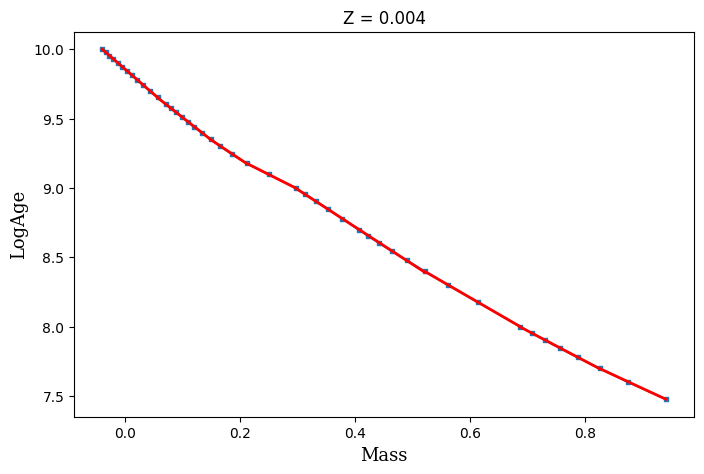

In [ ]:
plt.figure(figsize=[8,5])
plt.scatter(x_curve,y_curve,label= "BaSTI",marker = "s", s = 5 )
plt.plot(x_curve,y_curve)
for i in range(len(slopes)):
# Create x values within the limits
  x = np.linspace(lower_lim[i], higher_lim[i], 100)

  # Calculate y values based on the slope
  y = slopes[i] * x + intercepts[i]

  # Create the plot
  plt.plot(x, y, label=f'Slope = {slope}', color='red', linewidth=2)

  plt.ylabel('LogAge', fontsize = 13, fontname = "serif")
  plt.xlabel('Mass', fontsize = 13, fontname = "serif")
  plt.title("Z = 0." + Z_name )

  plt.savefig("Age_Mass_relation_fitted_line.png", dpi = 400)

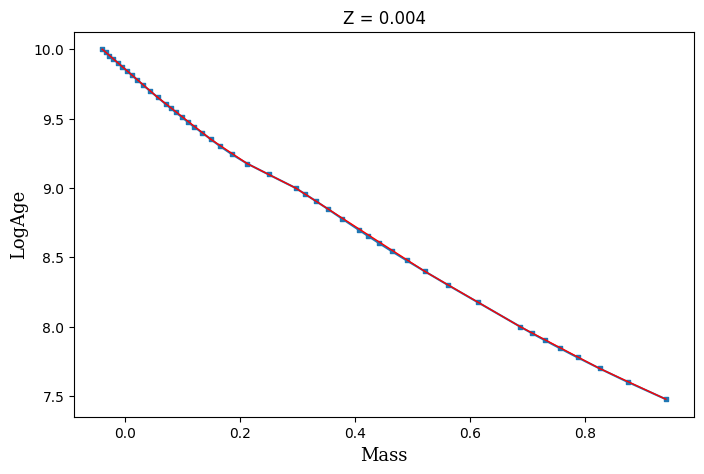

In [ ]:
plt.figure(figsize=[8,5])
plt.scatter(x_curve,y_curve,label= "BaSTI",marker = "s", s = 5 )
plt.plot(x_curve,y_curve)
for i in range(len(slopes)):
# Create x values within the limits
  x = np.linspace(lower_lim[i], higher_lim[i], 100)

  # Calculate y values based on the slope
  y = slopes_prime[i] * x + intercepts_prime[i]

  # Create the plot
  plt.plot(x, y, label=f'Slope = {slope}', color='red', linewidth=1)

  plt.ylabel('LogAge', fontsize = 13, fontname = "serif")
  plt.xlabel('Mass', fontsize = 13, fontname = "serif")
  plt.title("Z = 0." + Z_name )

  plt.savefig("Age_Mass_relation_fitted_line.png", dpi = 400)

In [ ]:
import numpy as np
from astropy.modeling import models, fitting

# Generate or import your data points (x, y) for the curve
x_curve = np.array(selected_df['Kmag'])
y_curve = np.log10(np.array(selected_df[M_col_name]))

# Define the number of small line segments you want to fit
num_segments = 10

# Calculate the number of points per segment
points_per_segment = len(x_curve) // num_segments

# Initialize lists to store slopes and intercepts for each segment
slopes = []
intercepts = []

slopes_prime = []
intercepts_prime = []

lower_lim = []
higher_lim = []
# Create a linear model
linear_model = models.Linear1D()

# Create a fitting object
fitter = fitting.LinearLSQFitter()


# Fit lines to each segment and calculate slopes and intercepts
i = 0
while (i) * points_per_segment < len(x_curve) :

    start_idx = i * points_per_segment - 1
    if start_idx < 0:
      start_idx = 0

    end_idx = (i + 1) * points_per_segment

    if end_idx > len(x_curve):
       end_idx = len(x_curve)

    x_segment = x_curve[start_idx:end_idx]
    y_segment = y_curve[start_idx:end_idx]
    lower_lim.append(x_segment[0])
    higher_lim.append(x_segment[-1])


    # Fit the linear model to the segment
    fitted_model = fitter(linear_model, x_segment, y_segment)

    # Extract the slope and intercept from the fitted model
    slope = fitted_model.slope.value
    intercept = fitted_model.intercept.value

    slopes.append(slope)
    intercepts.append(intercept)

    delta_x = x_segment[-1] - x_segment[0]
    delta_y = y_segment[-1] - y_segment[0]
    slope_ = delta_y/delta_x
    intercep_ = y_segment[0] - slope_ * x_segment[0]
    slopes_prime.append(slope_)
    intercepts_prime.append(intercep_)

    i = i + 1

# Print slopes and intercepts for each segment
for i in range(len(slopes)):
    print(f"Segment {i + 1}: Slope = {slopes[i]}, Intercept = {intercepts[i]}")


Segment 1: Slope = -0.24567681184424084, Intercept = -1.8708802620480154
Segment 2: Slope = -0.2589040150458213, Intercept = -1.970634783058721
Segment 3: Slope = -0.2730676374394773, Intercept = -2.0788921802104654
Segment 4: Slope = -0.2718449061187385, Intercept = -2.069511968661742
Segment 5: Slope = -0.32881507243335534, Intercept = -2.5250218693118684
Segment 6: Slope = -0.4069657386083966, Intercept = -3.162725574055442
Segment 7: Slope = -0.26677944240203966, Intercept = -1.9683962779731825
Segment 8: Slope = -0.2285680869787933, Intercept = -1.6393044172825302
Segment 9: Slope = -0.3182894467827987, Intercept = -2.4642755298924337
Segment 10: Slope = -0.5100412358235911, Intercept = -4.283893099271931
Segment 11: Slope = -0.8320577947097408, Intercept = -7.428157060638812
Segment 12: Slope = -0.6571164686813413, Intercept = -5.684826226693675


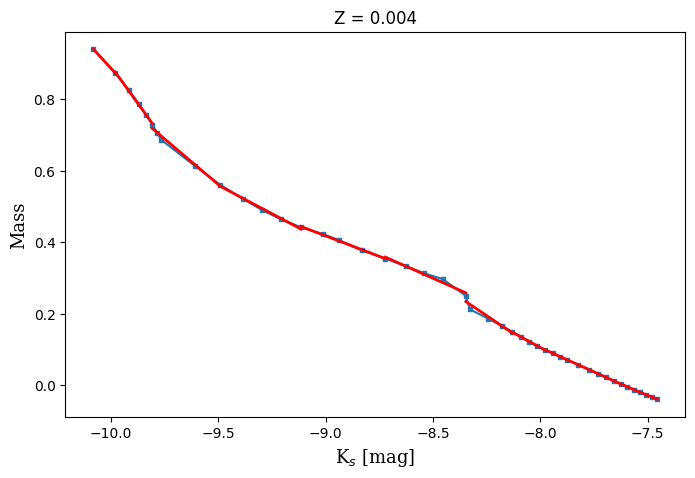

In [ ]:
plt.figure(figsize=[8,5])
plt.scatter(x_curve,y_curve,label= "BaSTI",marker = "s", s = 5 )
plt.plot(x_curve,y_curve)
for i in range(len(slopes)):
# Create x values within the limits
  x = np.linspace(lower_lim[i], higher_lim[i], 100)

  # Calculate y values based on the slope
  y = slopes[i] * x + intercepts[i]

  # Create the plot
  plt.plot(x, y, label=f'Slope = {slope}', color='red', linewidth=2)

plt.ylabel('Mass', fontsize = 13, fontname = "serif")
plt.xlabel('K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.title("Z = 0." + Z_name )

plt.savefig("Mass_Kmag_relation_fitted_line.png", dpi = 400)

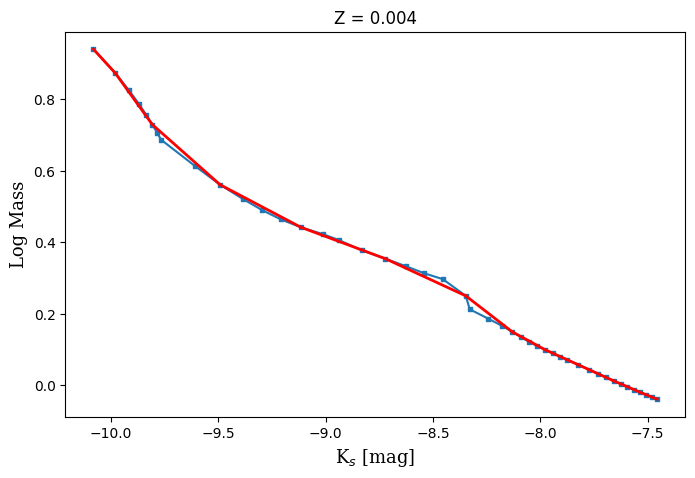

In [ ]:
plt.figure(figsize=[8,5])
plt.scatter(x_curve,y_curve,label= "BaSTI",marker = "s", s = 5 )
plt.plot(x_curve,y_curve)
for i in range(len(slopes)):
# Create x values within the limits
  x = np.linspace(lower_lim[i], higher_lim[i], 100)

  # Calculate y values based on the slope
  y = slopes_prime[i] * x + intercepts_prime[i]

  # Create the plot
  plt.plot(x, y, label=f'Slope = {slope}', color='red', linewidth=2)

plt.ylabel('Log Mass', fontsize = 13, fontname = "serif")
plt.xlabel('K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.title("Z = 0." + Z_name )

plt.savefig("Mass_Kmag_relation_fitted_line.png", dpi = 400)

In [ ]:
selected_df["Log_M_ini"] = np.log10(selected_df['(M/Mo)in'])

In [ ]:
selected_df['slope_bef'] = np.nan
selected_df['slope_aft'] = np.nan
for i in range(1,len(selected_df)-1):

  delta_y_bef = selected_df.loc[i,'Log_M_ini'] - selected_df.loc[i-1,'Log_M_ini']
  delta_y_aft = selected_df.loc[i+1,'Log_M_ini'] - selected_df.loc[i,'Log_M_ini']

  delta_x_bef = selected_df.loc[i,'Kmag'] - selected_df.loc[i-1,'Kmag']
  delta_x_aft = selected_df.loc[i+1,'Kmag'] - selected_df.loc[i,'Kmag']

  slope_bef = delta_y_bef / delta_x_bef
  slope_aft = delta_y_aft / delta_x_aft

  selected_df.at[i,'slope_bef'] = slope_bef
  selected_df.at[i,'slope_aft'] = slope_aft

selected_df['var_slope'] = abs(selected_df['slope_aft'] - selected_df['slope_bef'])

In [ ]:
index_1 = list(selected_df[selected_df['var_slope']>0.2].index)
index_1

[22, 23, 24, 37]

In [ ]:
# Generate or import your data points (x, y) for the curve
x_curve = np.array(selected_df['Kmag'])
y_curve = np.log10(np.array(selected_df[M_col_name]))

# Initialize lists to store slopes and intercepts for each segment
slopes = []
intercepts = []

slopes_prime = []
intercepts_prime = []

lower_lim = []
higher_lim = []

# Create a linear model
linear_model = models.Linear1D()

# Create a fitting object
fitter = fitting.LinearLSQFitter()


# Fit lines to each segment and calculate slopes and intercepts
index_1_prime = [0,11,15,22,23,24,30,33,35,37,42,len(x_curve)]

for i in range(len(index_1_prime)-1):

    x_segment = x_curve[index_1_prime[i]:index_1_prime[i+1]+1]
    y_segment = y_curve[index_1_prime[i]:index_1_prime[i+1]+1]

    lower_lim.append(x_segment[0])
    higher_lim.append(x_segment[-1])

    # Fit the linear model to the segment
    fitted_model = fitter(linear_model, x_segment, y_segment)

    # Extract the slope and intercept from the fitted model
    slope = fitted_model.slope.value
    intercept = fitted_model.intercept.value

    slopes.append(slope)
    intercepts.append(intercept)

    delta_x = x_segment[-1] - x_segment[0]
    delta_y = y_segment[-1] - y_segment[0]

    slope_ = delta_y/delta_x
    intercep_ = y_segment[0] - slope_ * x_segment[0]
    slopes_prime.append(slope_)
    intercepts_prime.append(intercep_)

    i = i + 1

# Print slopes and intercepts for each segment
for i in range(len(slopes)):
    print(f"Segment {i + 1}: Slope = {slopes[i]}, Intercept = {intercepts[i]}")

# Making Data frame for SFH calculation
columns = ['Z','a','b','K validity range(lower limit)','K validity range(upper limit)']

z_list = [Z] * len(lower_lim)
# Calling DataFrame constructor after zipping
# both lists, with columns specified
Mag_Mass_df = pd.DataFrame(list(zip(z_list, slopes_prime,intercepts_prime,
                               higher_lim,lower_lim)), columns =columns)

Mag_Mass_df = Mag_Mass_df.sort_values('K validity range(upper limit)')
Mag_Mass_df = Mag_Mass_df.reset_index()
Mag_Mass_df = Mag_Mass_df.drop("index",axis=1)
Mag_Mass_df.to_csv("Mag_Mass_relation_data.csv")

Segment 1: Slope = -0.26313024080900405, Intercept = -2.0021152083409195
Segment 2: Slope = -0.2718449061187385, Intercept = -2.069511968661742
Segment 3: Slope = -0.32873003309212934, Intercept = -2.5240954280539993
Segment 4: Slope = -2.0821554858751488, Intercept = -17.129744098556337
Segment 5: Slope = -0.43664349496680577, Intercept = -3.394655510444394
Segment 6: Slope = -0.22736923428057942, Intercept = -1.6278446024715887
Segment 7: Slope = -0.2368692765562426, Intercept = -1.7146462065919192
Segment 8: Slope = -0.36326873777566665, Intercept = -2.8874474922597084
Segment 9: Slope = -0.45825865991701625, Intercept = -3.7891425339148697
Segment 10: Slope = -0.9262930205612884, Intercept = -8.357181303515874
Segment 11: Slope = -0.6904162430037195, Intercept = -6.019601745368465


In [ ]:
Mag_Mass_df

,Z,a,b,K validity range(lower limit),K validity range(upper limit)
0,0.004,-0.693627,-6.052916,-10.081827,-9.915664
1,0.004,-0.927081,-8.367773,-9.915664,-9.767000
2,0.004,-0.457800,-3.784304,-9.767000,-9.492000
3,0.004,-0.362927,-2.883770,-9.492000,-9.296000
4,0.004,-0.237749,-1.720113,-9.296000,-9.014000
5,0.004,-0.225405,-1.608849,-9.014000,-8.454000
6,0.004,-0.436643,-3.394656,-8.454000,-8.347000
7,0.004,-2.082155,-17.129744,-8.347000,-8.329000
8,0.004,-0.322042,-2.469762,-8.329000,-7.976000
9,0.004,-0.271959,-2.070300,-7.976000,-7.823000


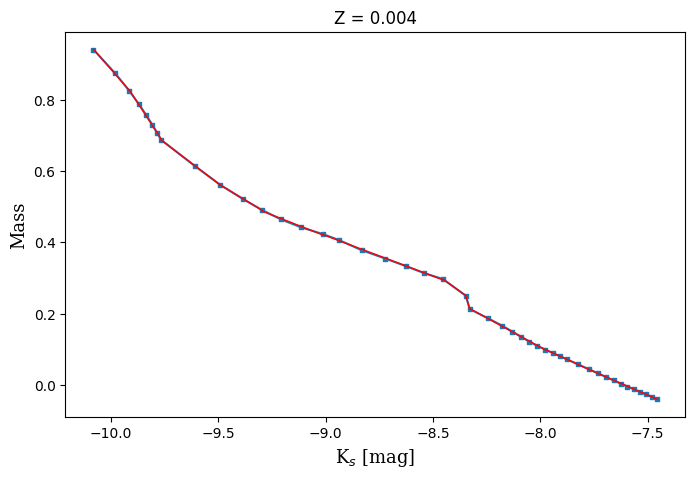

In [ ]:
plt.figure(figsize=[8,5])
plt.scatter(x_curve,y_curve,label= "BaSTI",marker = "s", s = 5 )
plt.plot(x_curve,y_curve)
for i in range(len(slopes)):
# Create x values within the limits
  x = np.linspace(lower_lim[i], higher_lim[i], 100)

  # Calculate y values based on the slope
  y = slopes[i] * x + intercepts[i]

  # Create the plot
  plt.plot(x, y, label=f'Slope = {slope}', color='red', linewidth=1)

plt.ylabel('Mass', fontsize = 13, fontname = "serif")
plt.xlabel('K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.title("Z = 0." + Z_name )

plt.savefig("Mass_Kmag_relation_fitted_line.png", dpi = 400)

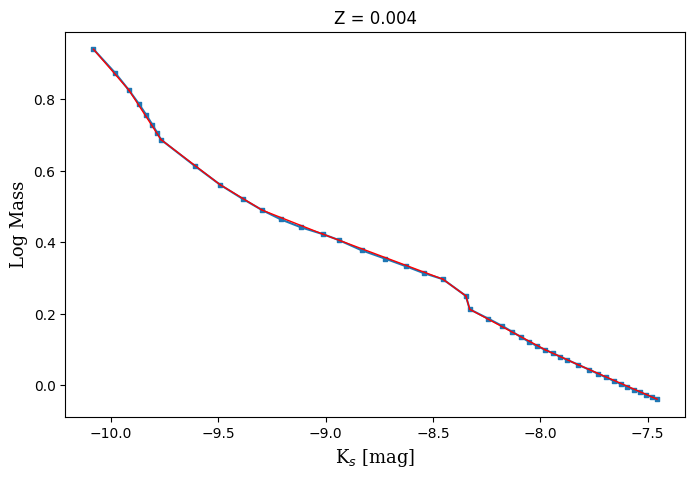

In [ ]:
plt.figure(figsize=[8,5])
plt.scatter(x_curve,y_curve,label= "BaSTI",marker = "s", s = 5 )
plt.plot(x_curve,y_curve)
for i in range(len(slopes)):
# Create x values within the limits
  x = np.linspace(lower_lim[i], higher_lim[i], 100)

  # Calculate y values based on the slope
  y = slopes_prime[i] * x + intercepts_prime[i]

  # Create the plot
  plt.plot(x, y, label=f'Slope = {slope}', color='red', linewidth=1)

plt.ylabel('Log Mass', fontsize = 13, fontname = "serif")
plt.xlabel('K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.title("Z = 0." + Z_name )

plt.savefig("Mass_Kmag_relation_fitted_line.png", dpi = 400)